In [7]:
#!/usr/bin/env python3
"""
read_results.py

This script reads the experiment_tracking.json file generated by run_experiments.py
and filters the data by command-line arguments to display the results in a meaningful way.

Author: Your Name
"""
import argparse
import json
import os

TRACKING_FILE = "experiment_tracking.json"

def show_results(models,probe_datasets,training_configs):
    if not os.path.isfile(TRACKING_FILE):
        print(f"[ERROR] Tracking file '{TRACKING_FILE}' does not exist. Exiting.")
        return
    
    with open(TRACKING_FILE, "r", encoding="utf-8") as f:
        data = json.load(f)
    
    # data should be a list of dicts, each with keys:
    #   model_name, probe_dataset, training_config, accuracy, ...
    # Filter based on command-line arguments
    filtered_data = []
    for entry in data:
        model_matches = True
        probe_matches = True
        config_matches = True
        
        if models is not None and len(models) > 0:
            model_matches = entry.get("model_name") in models
        if probe_datasets is not None and len(probe_datasets) > 0:
            probe_matches = entry.get("probe_dataset") in probe_datasets
        if training_configs is not None and len(training_configs) > 0:
            config_matches = entry.get("training_config") in training_configs
        
        if model_matches and probe_matches and config_matches:
            filtered_data.append(entry)
    
    if not filtered_data:
        print("[INFO] No results match the specified filters.")
        return
    
    # Print results in a meaningful way
    print("Filtered Experiment Results:")
    print("---------------------------------------------------------")
    for entry in filtered_data:
        model_name = entry.get("model_name")
        probe_dataset = entry.get("probe_dataset")
        training_config = entry.get("training_config")
        accuracy = entry.get("accuracy")
        print(f"Model: {model_name}, Probe Dataset: {probe_dataset}, Training Config: {training_config}, Accuracy: {accuracy}")
    print("---------------------------------------------------------")
    print(f"Total results found: {len(filtered_data)}")
    plot_model_accuracy(filtered_data)

In [8]:
import matplotlib.pyplot as plt
import random

def parse_model_name(model_name):
    """
    Parses the model name to extract the base name and the trailing number.
    Assumes the model name ends with _{number}K, where {number} is an integer.
    """
    parts = model_name.split("_")
    number_part = parts[-1]
    base_name = "_".join(parts[:-1])
    if number_part.endswith("K"):
        number = int(number_part[:-1])
    else:
        raise ValueError(f"Unexpected model name format: {model_name}")
    return base_name, number

def assign_colors(base_names):
    """
    Assigns a unique color to each base name.
    """
    colors = {}
    for base_name in base_names:
        if base_name not in colors:
            colors[base_name] = "#%06x" % random.randint(0, 0xFFFFFF)
    return colors

def plot_model_accuracy(filtered_data):
    """
    Parses filtered data, groups by base names, and plots accuracy vs. the trailing number in model names.

    Parameters:
        filtered_data (list of dict): The filtered data containing model_name, probe_dataset, training_config, and accuracy.
    """
    model_points = {}

    # Parse the model names and group data by base name
    for entry in filtered_data:
        model_name = entry.get("model_name")
        accuracy = entry.get("accuracy")

        if not model_name or accuracy is None:
            continue

        try:
            base_name, number = parse_model_name(model_name)
        except ValueError as e:
            print(e)
            continue

        if base_name not in model_points:
            model_points[base_name] = []
        model_points[base_name].append((number, accuracy))

    # Assign colors to each base name
    base_names = model_points.keys()
    colors = assign_colors(base_names)

    # Plot data
    plt.figure(figsize=(10, 6))
    for base_name, points in model_points.items():
        points.sort(key=lambda x: x[0])  # Sort by the trailing number (x-axis)
        x, y = zip(*points)
        plt.plot(x, y, label=base_name, color=colors[base_name], marker='o')

    plt.xlabel("Trailing Number (K)")
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy by Trailing Number")
    plt.legend(title="Base Name")
    plt.grid(True)
    plt.show()

['big_random16M_vocab32_50K', 'big_random16M_vocab32_100K', 'big_random16M_vocab32_200K', 'big_random16M_vocab32_300K', 'big_random16M_vocab32_160K', 'big_random16M_vocab32_175K']
Filtered Experiment Results:
---------------------------------------------------------
Model: big_random16M_vocab32_50K, Probe Dataset: random, Training Config: classic, Accuracy: 0.8326231241226196
Model: big_random16M_vocab32_100K, Probe Dataset: random, Training Config: classic, Accuracy: 0.841856062412262
Model: big_random16M_vocab32_200K, Probe Dataset: random, Training Config: classic, Accuracy: 0.8567708730697632
Model: big_random16M_vocab32_300K, Probe Dataset: random, Training Config: classic, Accuracy: 0.822206437587738
Model: big_random16M_vocab32_160K, Probe Dataset: random, Training Config: classic, Accuracy: 0.7997159361839294
Model: big_random16M_vocab32_175K, Probe Dataset: random, Training Config: classic, Accuracy: 0.8288352489471436
---------------------------------------------------------


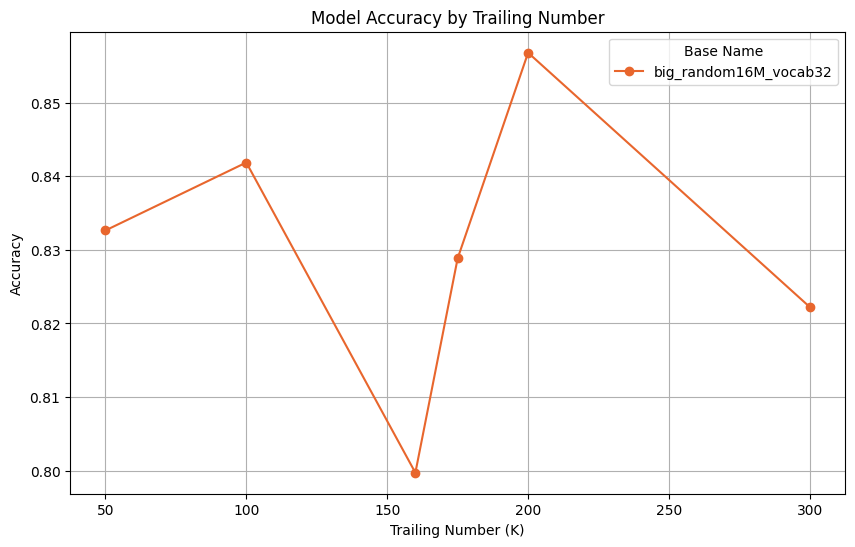

In [9]:
base_model = 'big_random16M_vocab32_'
iterations = [50,100,200,300,160,175]
models = [(base_model + str(i) + 'K') for i in iterations]
print(models)
probe_datasets = ['random']
training_configs = ['classic']

show_results(models,probe_datasets,training_configs)

 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


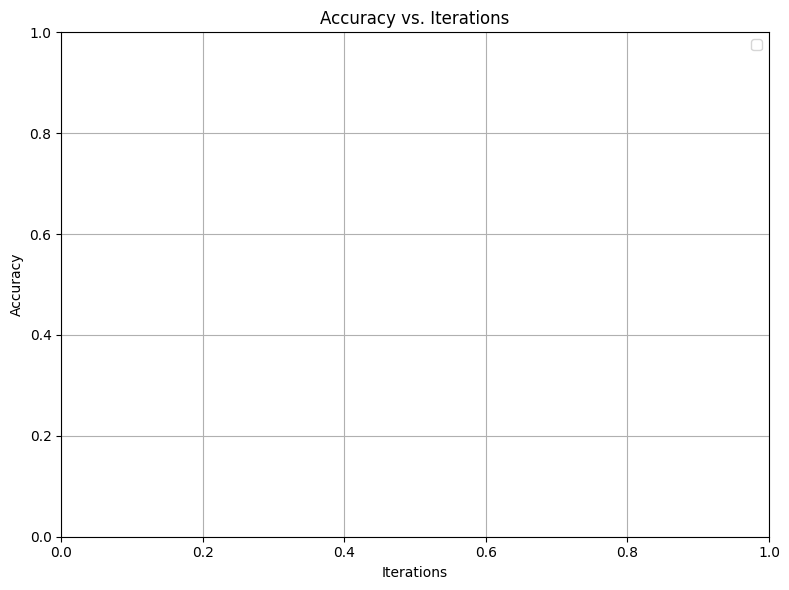

In [13]:
import plot_probe_results as g
import importlib

importlib.reload(g)


results_datapath = 'experiment_tracking.json'
model_prefixes=["big_random16M", "lichess_karvhyp"]
max_train_games_list=["20000"]
num_epochs_list=["3"],
probe_datasets=["lichess"]
training_configs=["classic"]
selection_arg="probe_dataset"

g.plot_accuracy_by_iterations(
    results_datapath,
    model_prefixes,
    max_train_games_list,
    num_epochs_list,
    probe_datasets,
    training_configs,
    selection_arg
)
